In [97]:
import pandas
import matplotlib.pyplot as plt
# # other：35%

# meal:5%

# sleep:37%

# out:26%

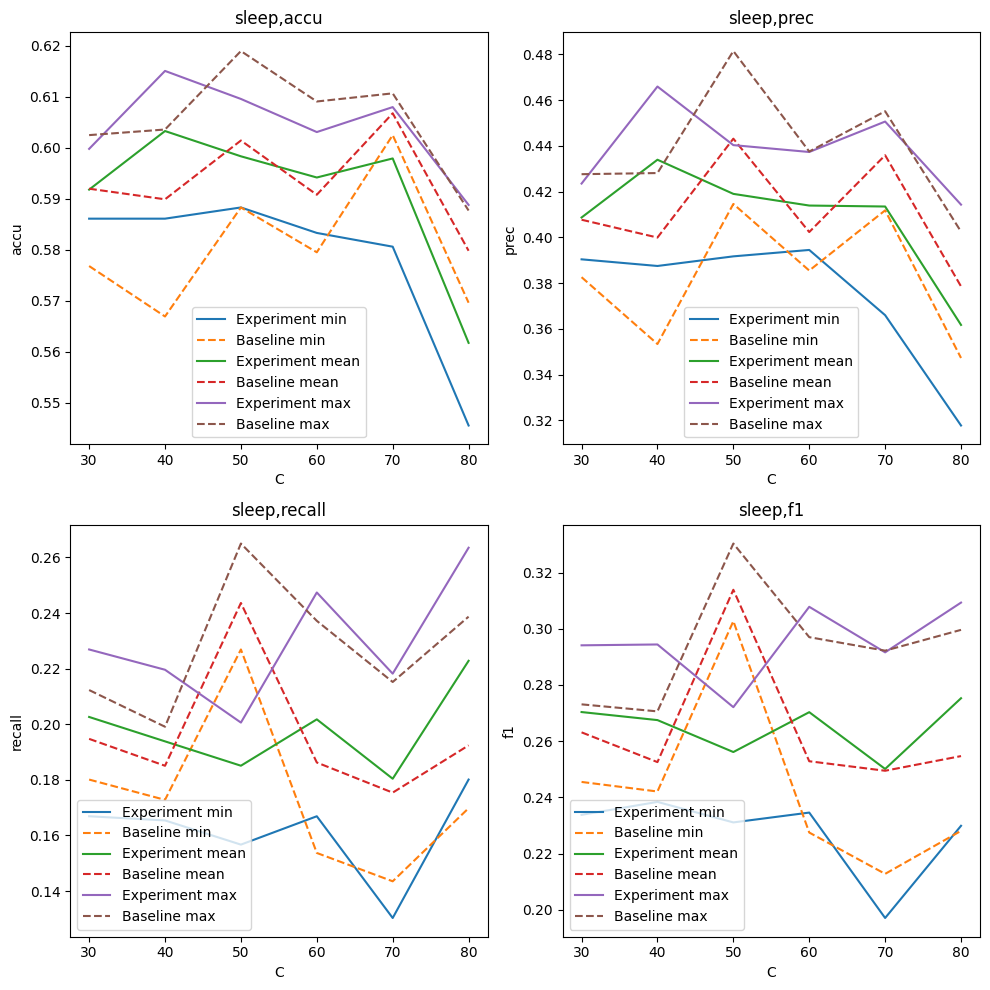

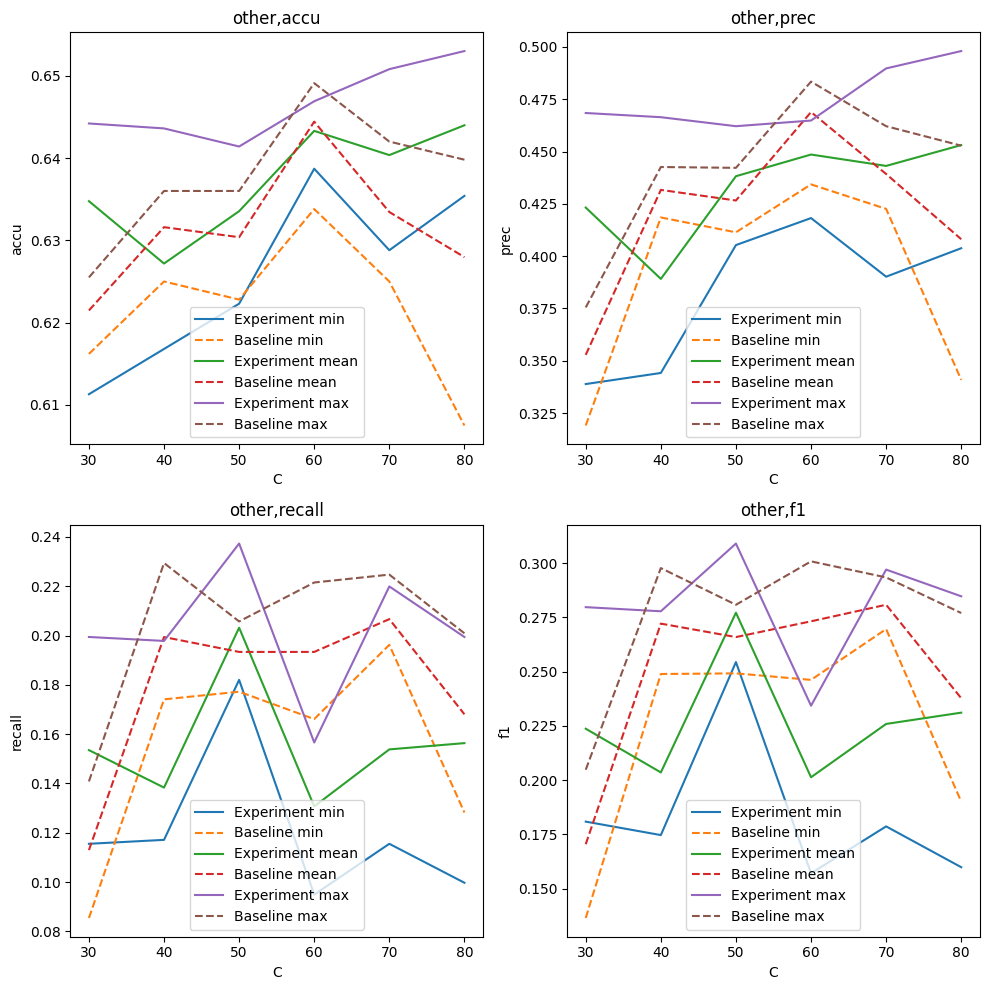

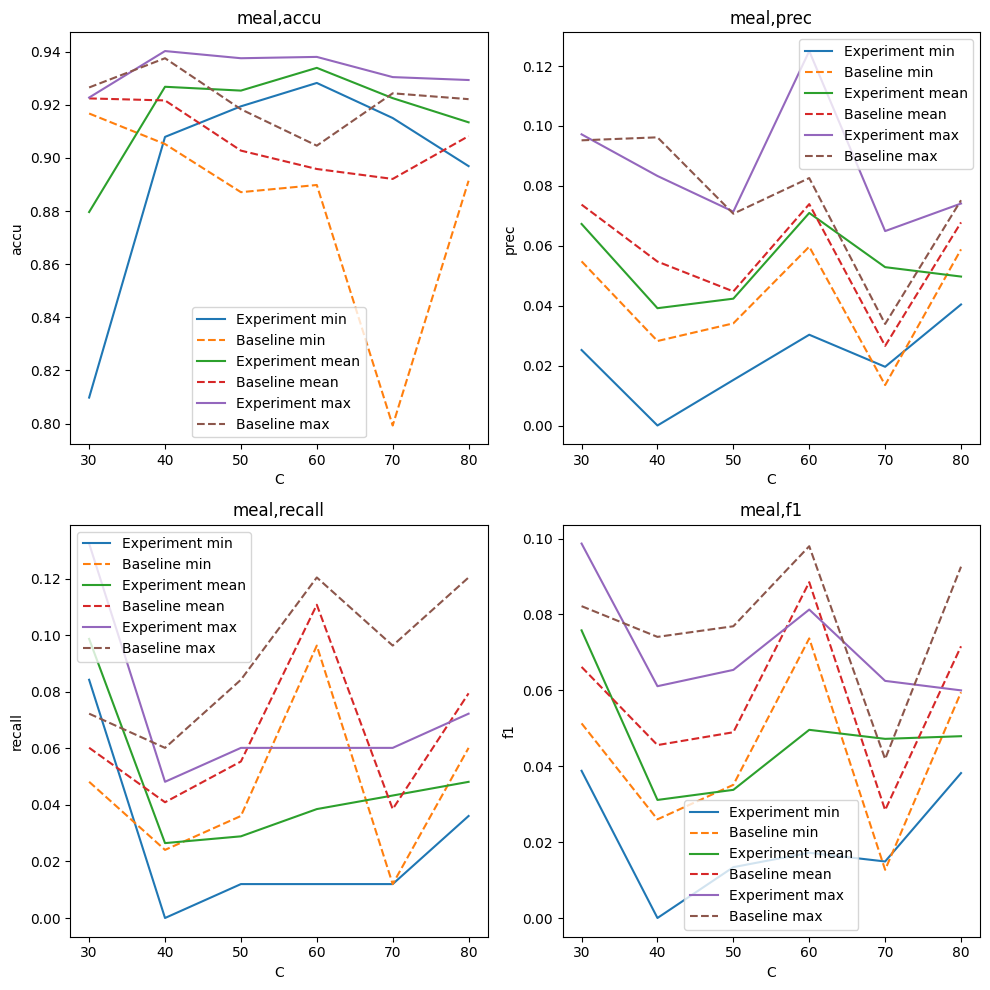

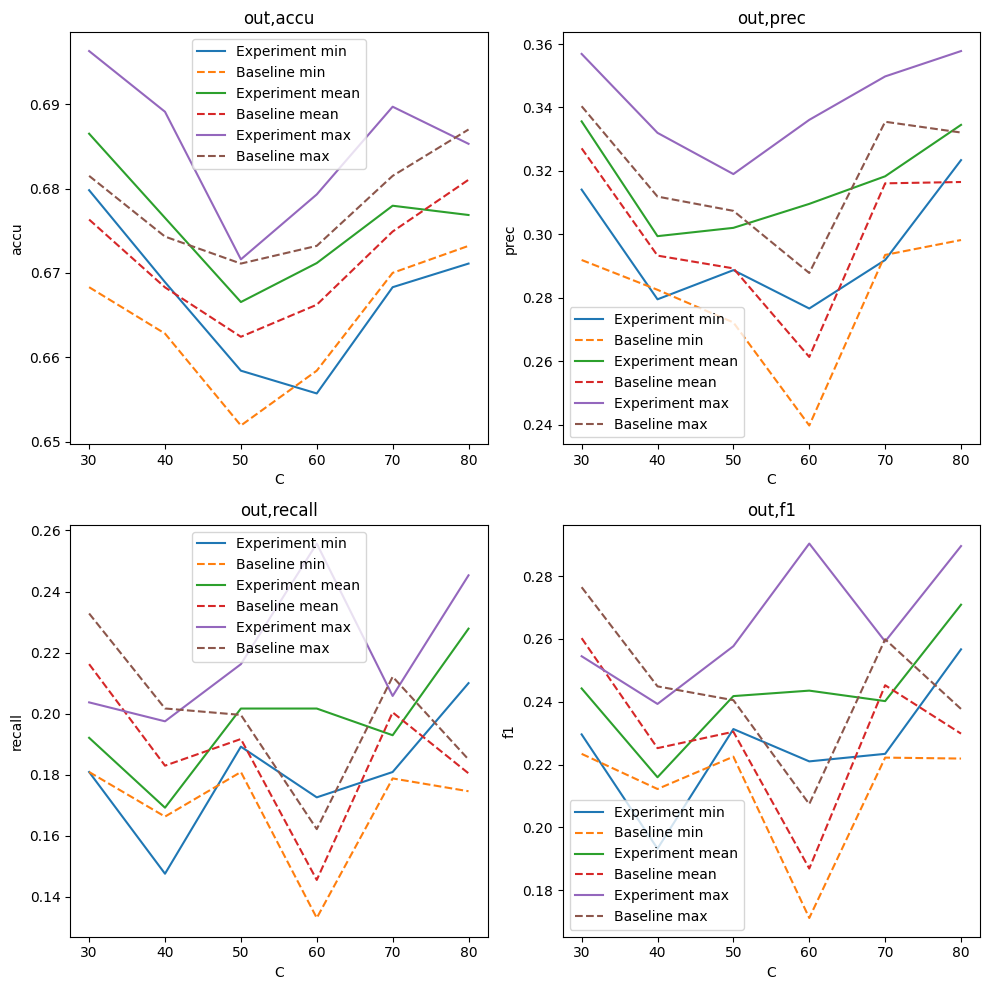

In [99]:


behav =['sleep','other','meal','out']
rang=[[(0, 1), (1, 5)],[(0, 3), (3, 5)],[(0, 2), (2, 5)],[(0, 2), (1, 5)]]
df=pandas.read_csv('baseline.csv',index_col=False)

for item, ra in zip(behav, rang):
    mask = (df['item'] == item) & (df['range'].apply(str) == str(ra))
    filtered_df = df[mask][['C', 'accu', 'prec', 'recall', 'f1']].groupby('C').agg(['min', 'mean', 'max'])
    mask_baseline = (df['item'] == item) & (df['range'].apply(str) == str([(0, 5)]))
    filtered_baseline = df[mask_baseline][['C', 'accu', 'prec', 'recall', 'f1']].groupby('C').agg(['min', 'mean', 'max'])
    # create a figure with subplots
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    metrics = ['accu', 'prec', 'recall', 'f1']
    for i, ax in enumerate(axs.flatten()):
        metric = metrics[i]
        for stat in ['min', 'mean', 'max']:
            ax.plot(filtered_df.index, filtered_df[(metric, stat)], label=f'Experiment {stat}')
            ax.plot(filtered_baseline.index, filtered_baseline[(metric, stat)], linestyle='--', label=f'Baseline {stat}')
        ax.set_xlabel('C')
        ax.set_ylabel(metric)
        ax.set_title(f'{item},{metric}')
        ax.legend()

    plt.tight_layout()
    plt.savefig(f'src/{item}.png')
    plt.show()



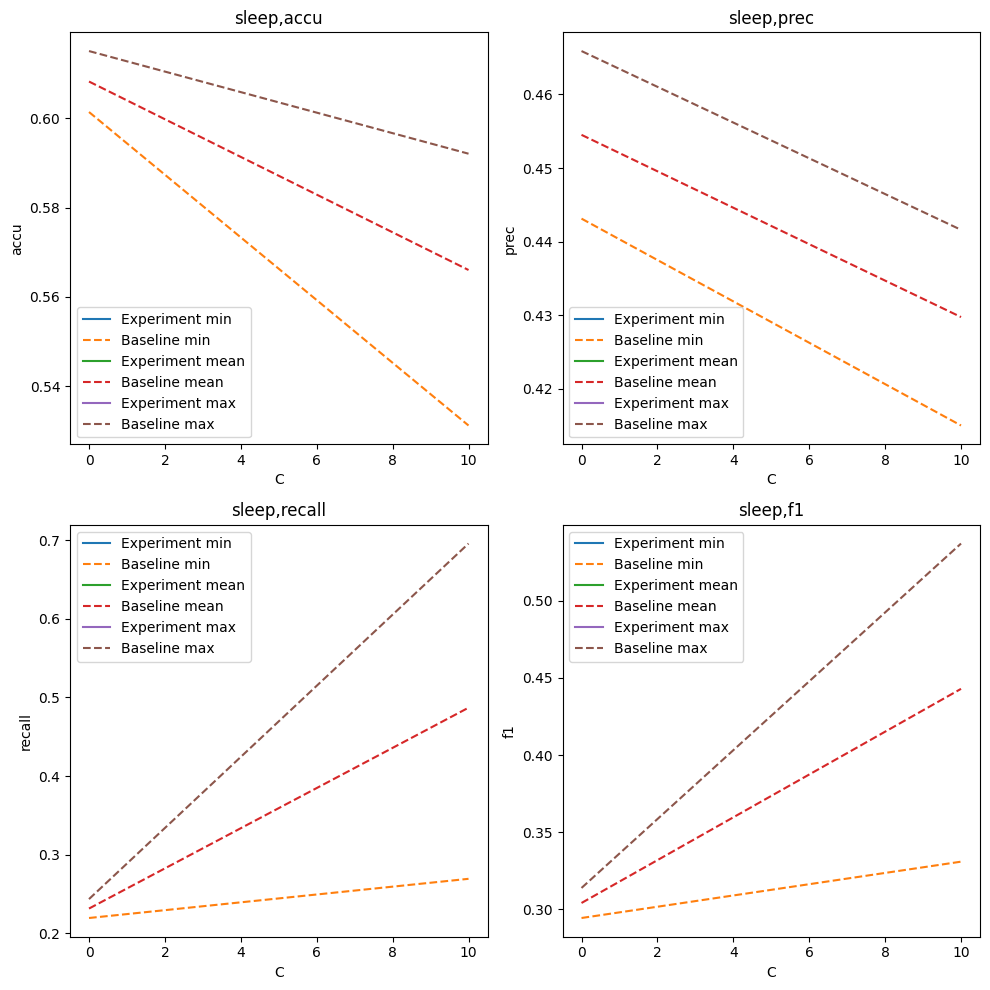

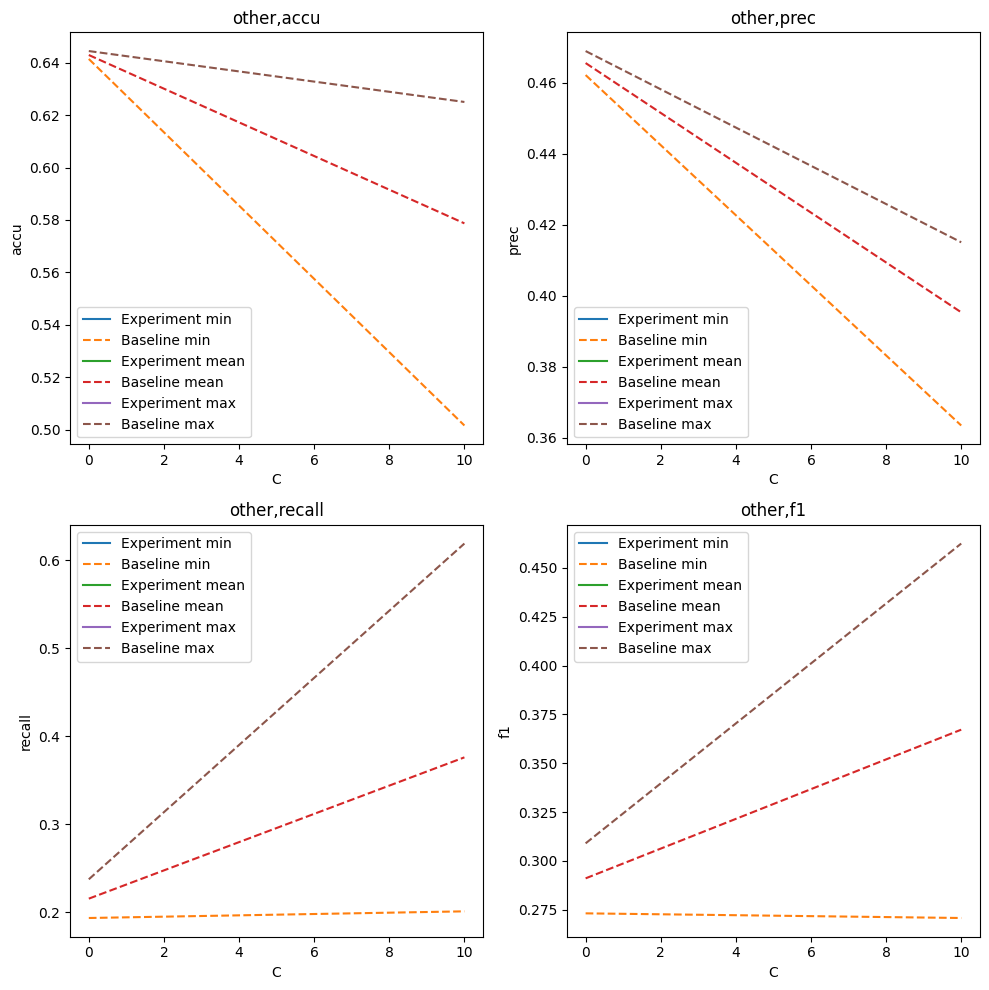

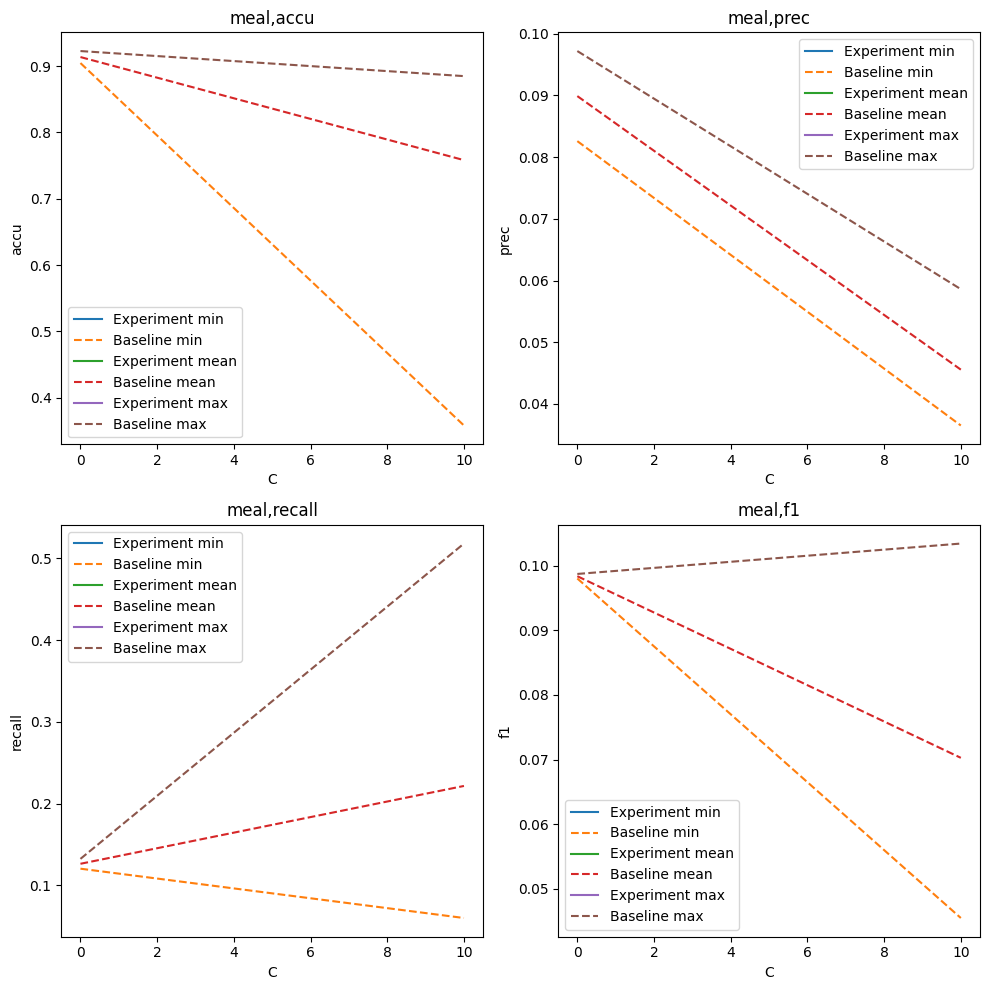

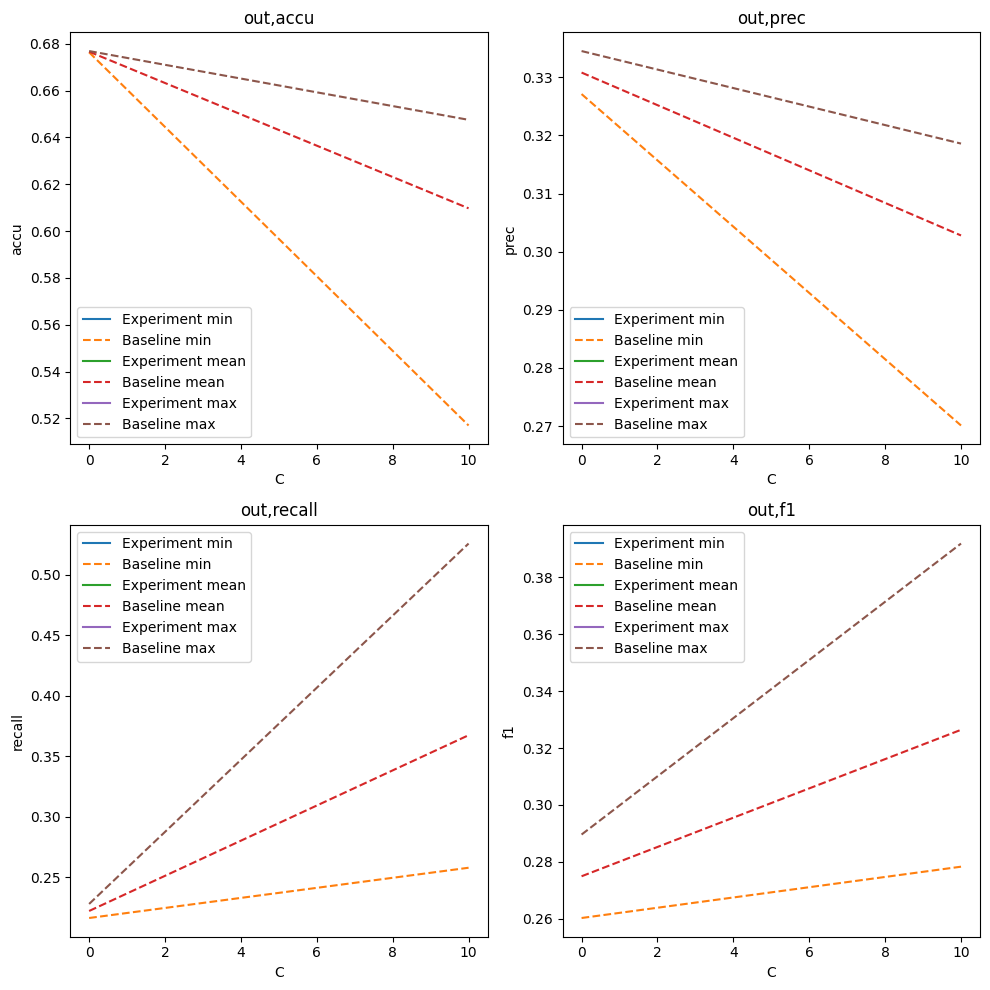

In [104]:
import matplotlib.pyplot as plt
df=pandas.read_csv('ppp_result.csv',index_col=False)
behav =['sleep','other','meal','out']
rang=[[(0, 1), (1, 5)],[(0, 3), (3, 5)],[(0, 2), (2, 5)],[(0, 2), (1, 5)]]

for item, ra in zip(behav, rang):
    mask = (df['item'] == item) & (df['range'].apply(str) == str(ra))
    filtered_df = df[mask][['C', 'accu', 'prec', 'recall', 'f1']].groupby('C').agg(['min', 'mean', 'max'])
    
    mask_baseline = (df['item'] == item) & (df['range'].apply(str) == str([(0, 5)]))
    filtered_baseline = df[mask_baseline][['C', 'accu', 'prec', 'recall', 'f1']].groupby('C').agg(['min', 'mean', 'max'])
    
    # create a figure with subplots
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    metrics = ['accu', 'prec', 'recall', 'f1']
    for i, ax in enumerate(axs.flatten()):
        metric = metrics[i]
        for stat in ['min', 'mean', 'max']:
            ax.plot(filtered_df.index, filtered_df[(metric, stat)], label=f'Experiment {stat}')
            ax.plot(filtered_baseline.index, filtered_baseline[(metric, stat)], linestyle='--', label=f'Baseline {stat}')
        ax.set_xlabel('C')
        ax.set_ylabel(metric)
        ax.set_title(f'{item},{metric}')
        ax.legend()
    plt.tight_layout()
    plt.savefig(f'src/{item}.png')
    plt.show()


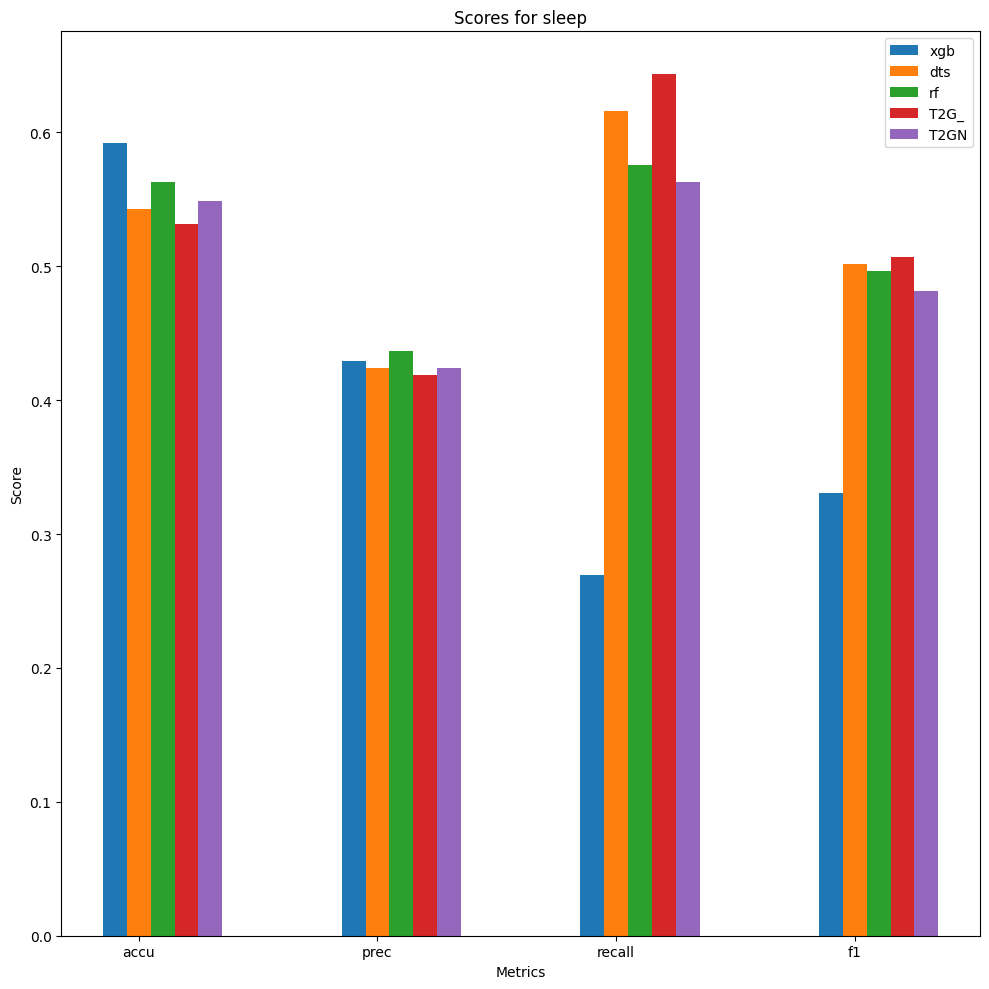

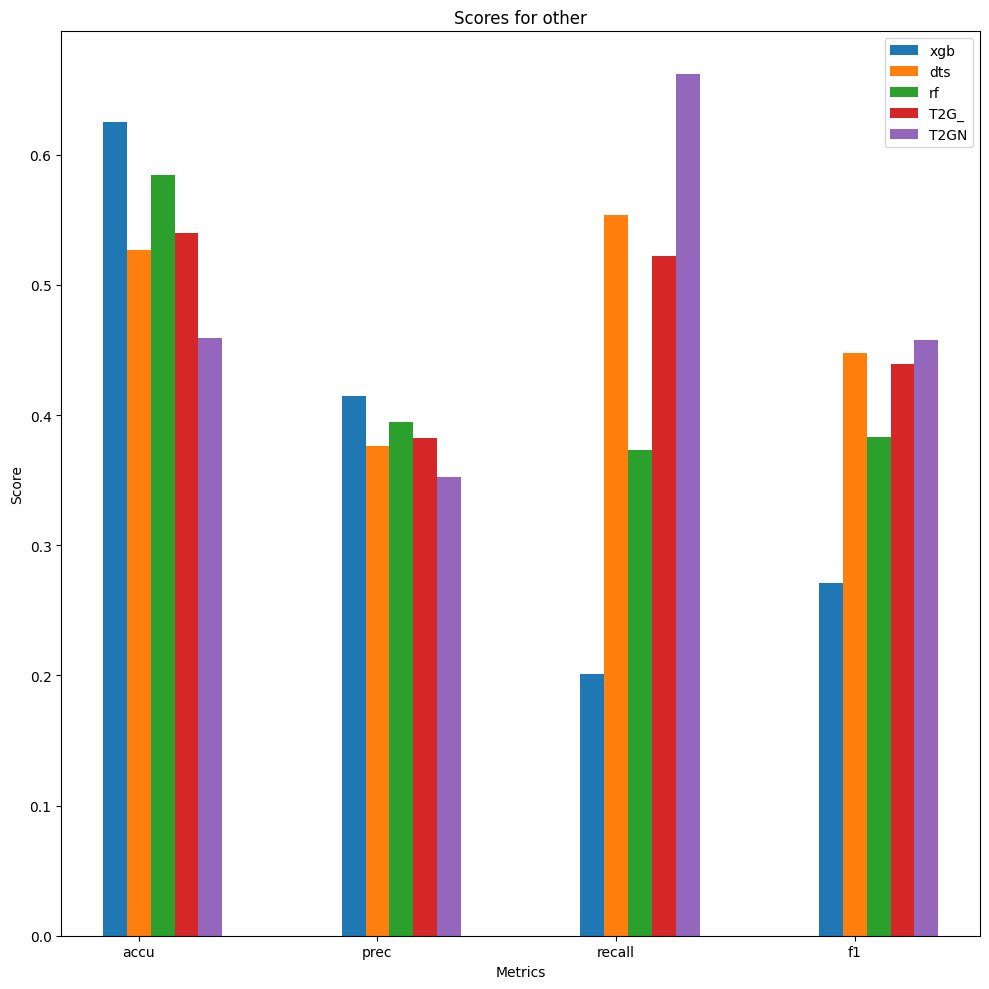

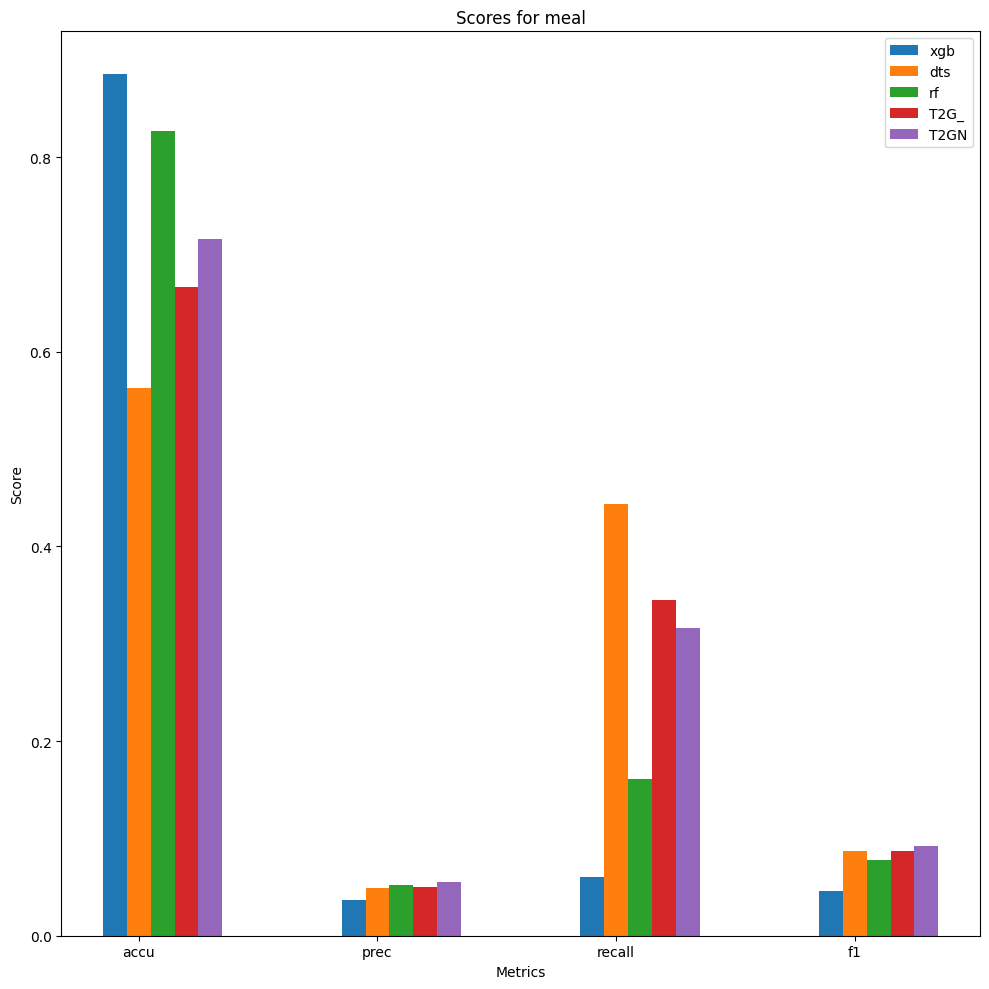

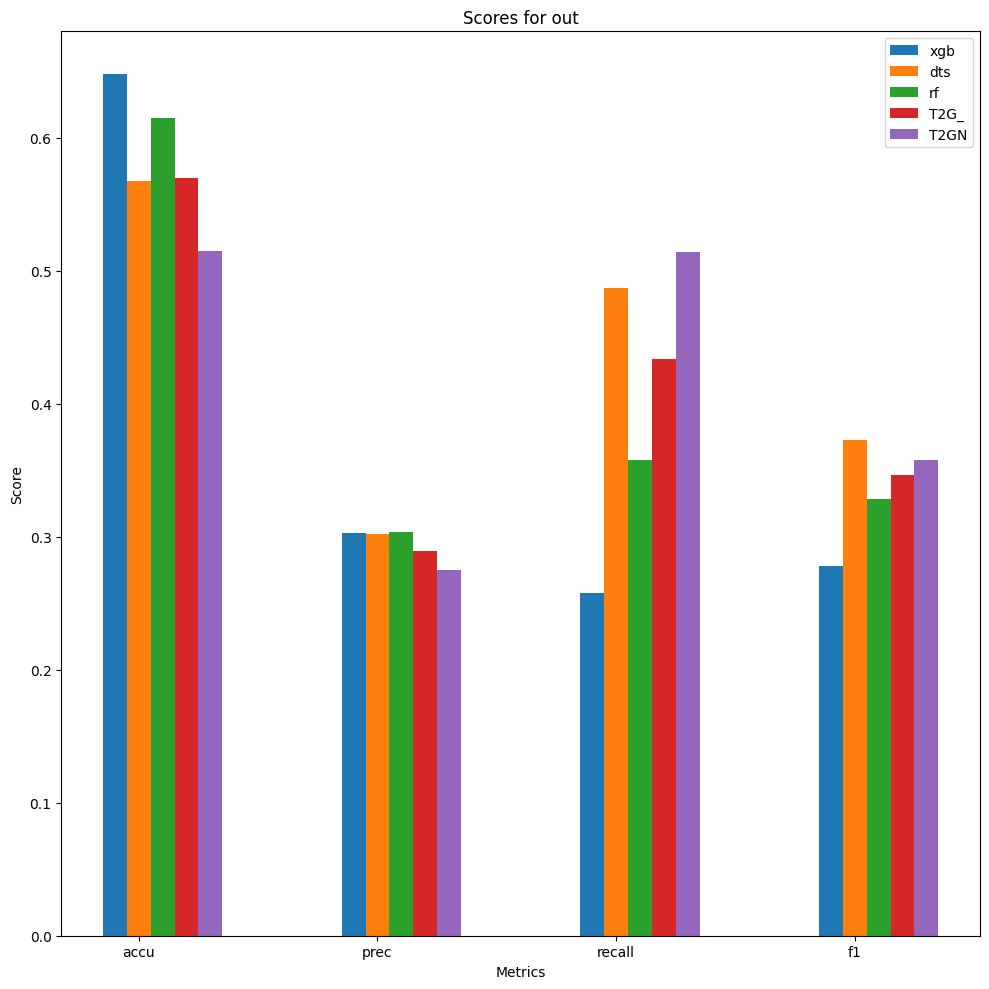

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
df=pandas.read_csv('ppp_result.csv',index_col=False)
behav =['sleep','other','meal','out']

# Get unique 'ker' values
ker_values = ['xgb','dts','rf','T2G_','T2GN']
# df['ker'].unique()

# Define the width of each bar and their positions
width = 0.1
n = len(behav)
r = [np.arange(n)]  # the label locations
for _ in range(1, len(ker_values)):
    r.append([x + width for x in r[-1]])

for item in behav:
    mask = (df['item'] == item)
    filtered_df = df[mask][['ker', 'accu', 'prec', 'recall', 'f1']].groupby('ker').agg(['min', 'mean', 'max'])

    # create a figure
    fig, ax = plt.subplots(figsize=(10, 10))

    metrics = ['accu', 'prec', 'recall', 'f1']
    for i, ker in enumerate(ker_values):
        values = [filtered_df.loc[ker, (metric, 'mean')] for metric in metrics]
        ax.bar(r[i], values, width, label=f'{ker}')

    ax.set_xlabel('Metrics')
    ax.set_ylabel('Score')
    ax.set_title(f'Scores for {item}')
    ax.set_xticks([r_val + width for r_val in range(n)])
    ax.set_xticklabels(metrics)
    ax.legend()

    plt.tight_layout()
    plt.savefig(f'src/{item}.png')
    plt.show()


In [102]:
behav = ['sleep', 'other', 'meal', 'out']
rang = [[(0, 1), (1, 5)], [(0, 3), (3, 5)], [(0, 2), (2, 5)], [(0, 2), (1, 5)]]
df = pandas.read_csv('baseline.csv', index_col=False)

for item, ra in zip(behav, rang):
    mask = (df['item'] == item) & (df['range'].apply(str) == str(ra))
    filtered_df = df[mask][['C', 'accu', 'prec', 'recall', 'f1']].groupby('C').agg(['min', 'mean', 'max'])
    
    # Calculate the mean across 'accu', 'prec', 'recall' and 'f1' for filtered_df
    filtered_df['mean_score'] = filtered_df[[('accu', 'mean'), ('prec', 'mean'), ('recall', 'mean'), ('f1', 'mean')]].mean(axis=1)
    
    # Find the 'C' with the highest mean score for filtered_df
    best_C_df = filtered_df['mean_score'].idxmax()
    
    print(f"For filtered_df with item={item} and range={ra}, the 'C' with the highest mean score is {best_C_df}.")
    print("The corresponding 'accu', 'prec', 'recall', 'f1' are:")
    print(filtered_df.loc[best_C_df])
    
    mask_baseline = (df['item'] == item) & (df['range'].apply(str) == str([(0, 5)]))
    filtered_baseline = df[mask_baseline][['C', 'accu', 'prec', 'recall', 'f1']].groupby('C').agg(['min', 'mean', 'max'])
    
    # Calculate the mean across 'accu', 'prec', 'recall' and 'f1' for filtered_baseline
    filtered_baseline['mean_score'] = filtered_baseline[[('accu', 'mean'), ('prec', 'mean'), ('recall', 'mean'), ('f1', 'mean')]].mean(axis=1)
    
    # Find the 'C' with the highest mean score for filtered_baseline
    best_C_baseline = filtered_baseline['mean_score'].idxmax()
    
    print(f"For filtered_baseline with item={item}, the 'C' with the highest mean score is {best_C_baseline}.")
    print("The corresponding 'accu', 'prec', 'recall', 'f1' are:")
    print(filtered_baseline.loc[best_C_baseline])


For filtered_df with item=sleep and range=[(0, 1), (1, 5)], the 'C' with the highest mean score is 40.
The corresponding 'accu', 'prec', 'recall', 'f1' are:
accu        min     0.58610
            mean    0.60330
            max     0.61510
prec        min     0.38750
            mean    0.43392
            max     0.46590
recall      min     0.16540
            mean    0.19384
            max     0.21960
f1          min     0.23840
            mean    0.26750
            max     0.29440
mean_score          0.37464
Name: 40, dtype: float64
For filtered_baseline with item=sleep, the 'C' with the highest mean score is 50.
The corresponding 'accu', 'prec', 'recall', 'f1' are:
accu        min     0.58830
            mean    0.60144
            max     0.61900
prec        min     0.41460
            mean    0.44312
            max     0.48140
recall      min     0.22690
            mean    0.24362
            max     0.26500
f1          min     0.30270
            mean    0.31386
          

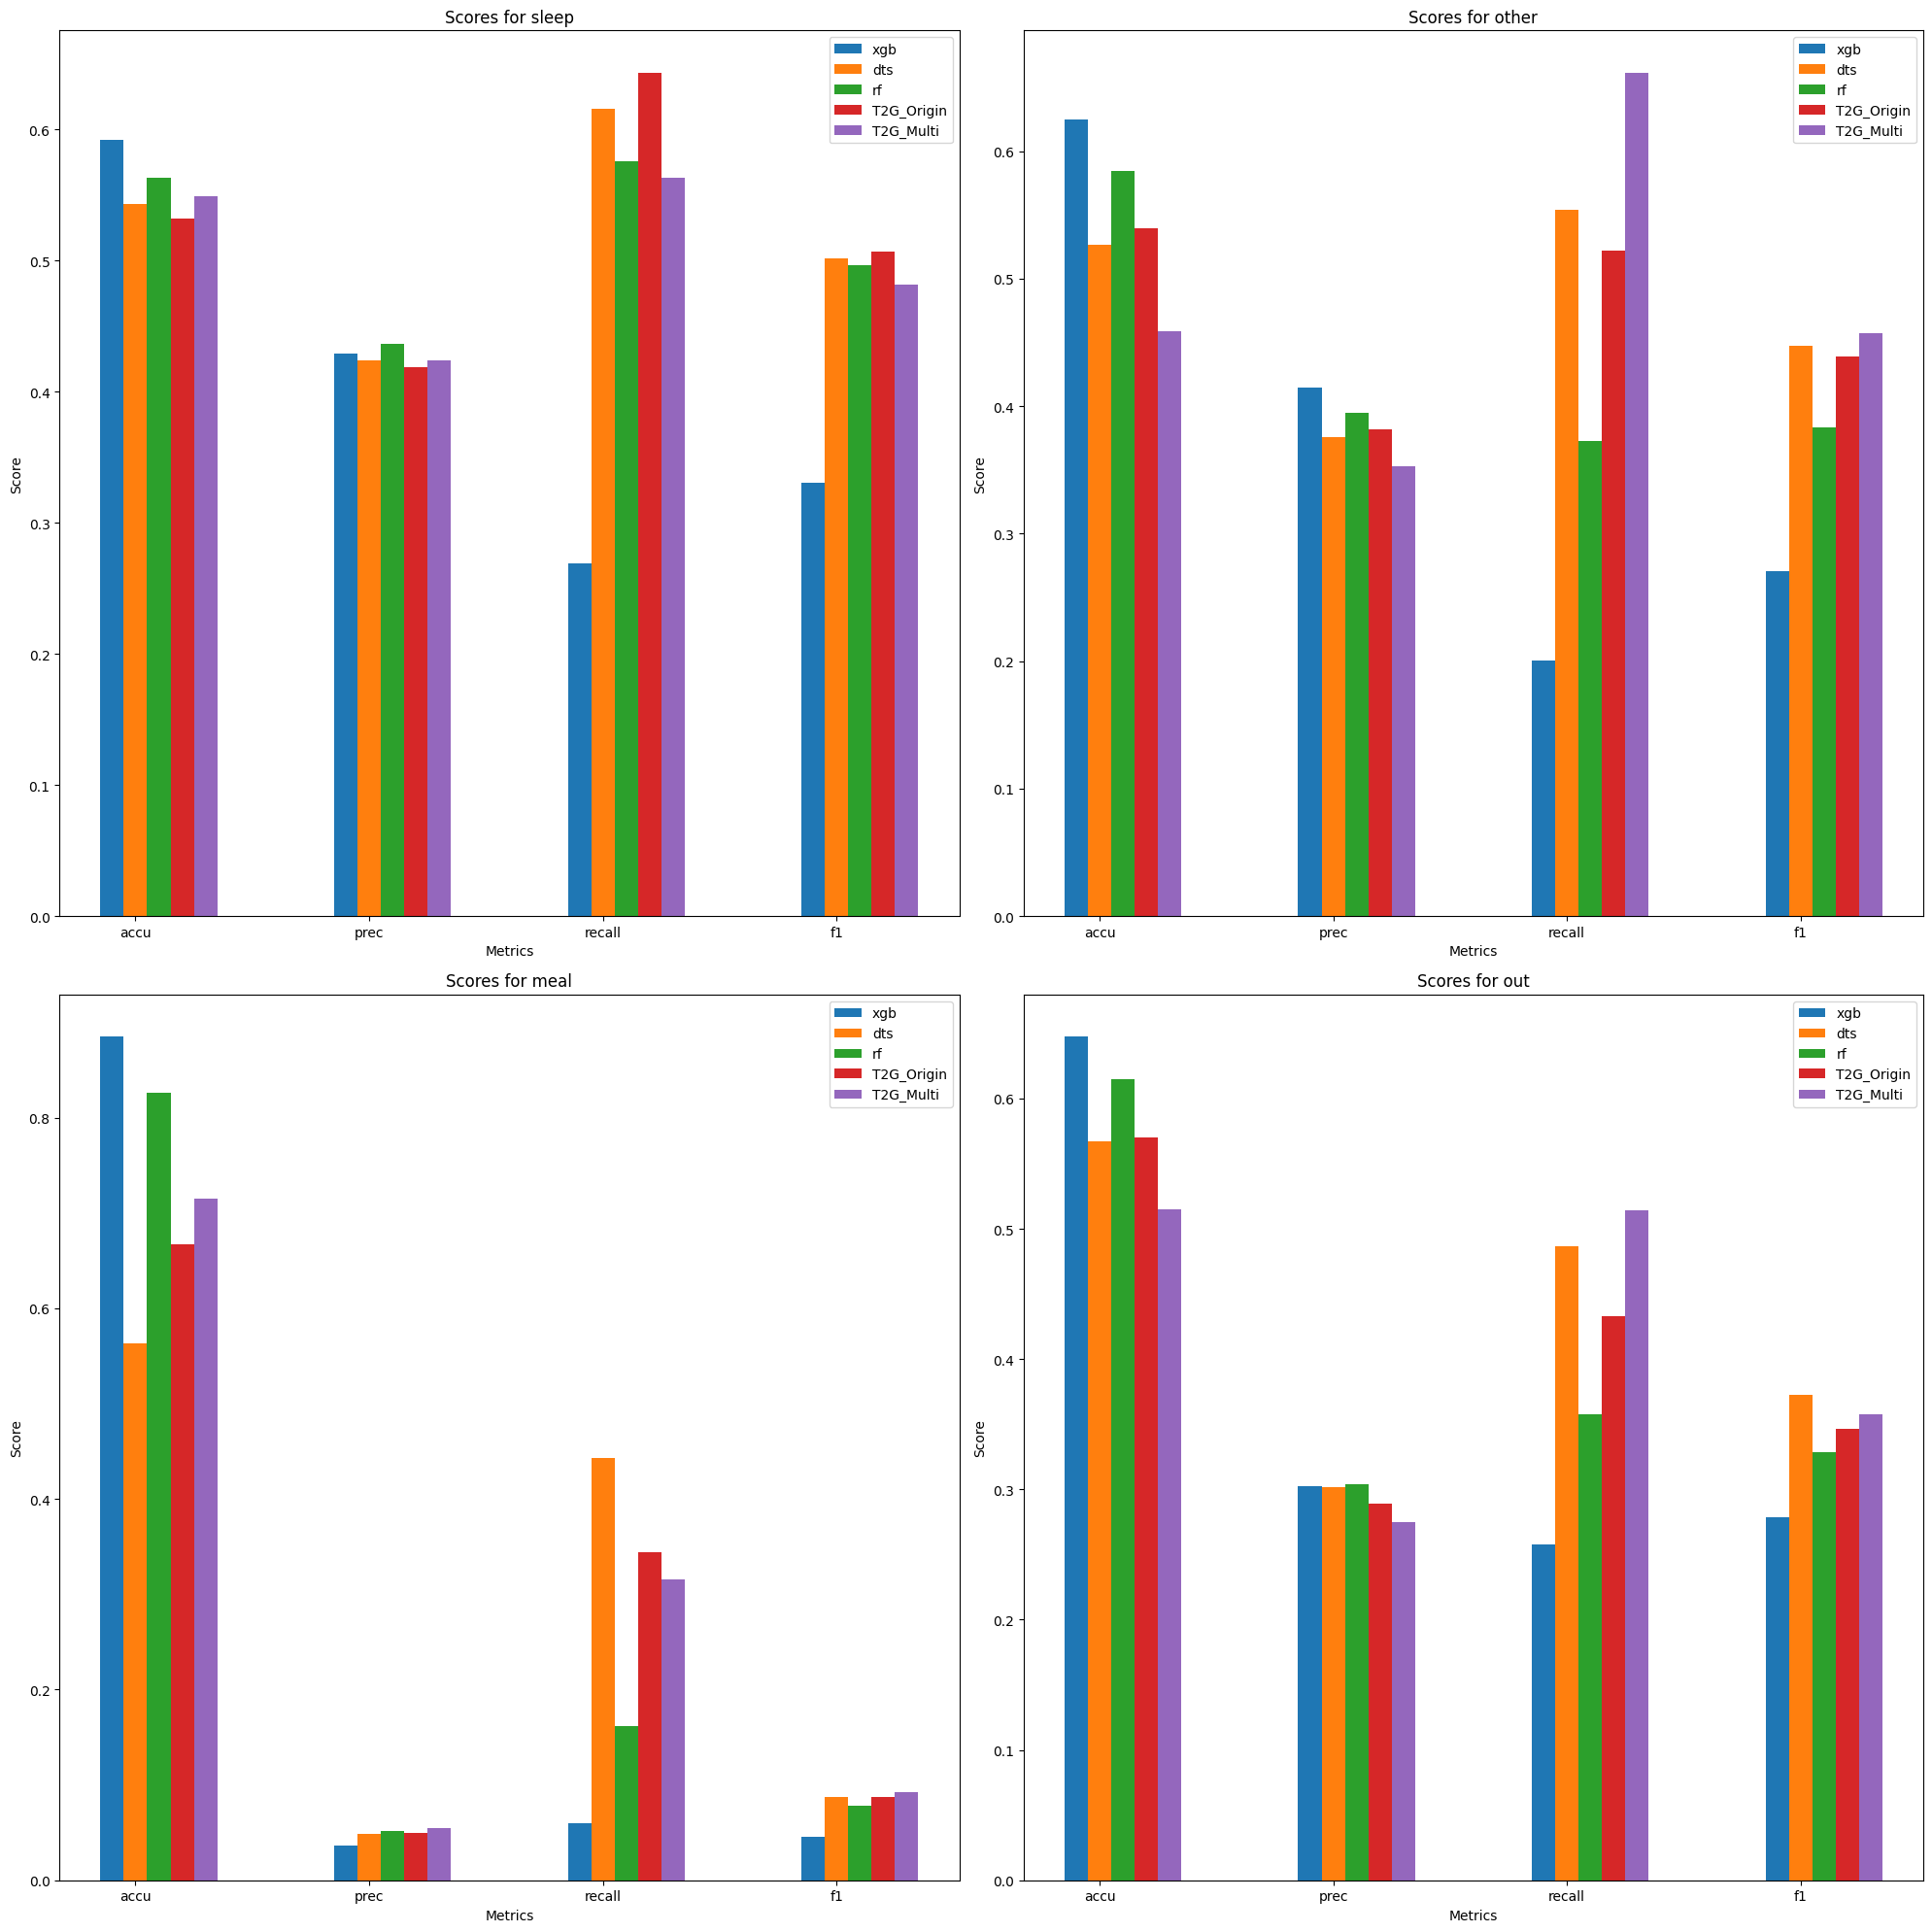

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('ppp_result.csv',index_col=False)
behav = ['sleep','other','meal','out']

# Get unique 'ker' values
ker_values = ['xgb','dts','rf','T2G_Origin','T2G_Multi']

# Define the width of each bar and their positions
width = 0.1
n = len(behav)
r = [np.arange(n)]  # the label locations
for _ in range(1, len(ker_values)):
    r.append([x + width for x in r[-1]])

# Create a figure with a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
axs = axs.flatten()  # flatten the 2x2 grid to a 1D array

for j, item in enumerate(behav):
    ax = axs[j]  # Select the subplot

    mask = (df['item'] == item)
    filtered_df = df[mask][['ker', 'accu', 'prec', 'recall', 'f1']].groupby('ker').agg(['min', 'mean', 'max'])

    metrics = ['accu', 'prec', 'recall', 'f1']
    for i, ker in enumerate(ker_values):
        values = [filtered_df.loc[ker, (metric, 'mean')] for metric in metrics]
        ax.bar(r[i], values, width, label=f'{ker}')

    ax.set_xlabel('Metrics')
    ax.set_ylabel('Score')
    ax.set_title(f'Scores for {item}')
    ax.set_xticks([r_val + width for r_val in range(n)])
    ax.set_xticklabels(metrics)
    ax.legend()

plt.tight_layout()
plt.savefig('src/combined.png')
plt.show()
